# TUGAS PRAKTIKUM

#### NAMA     : AHMED FATHIR SYAFAAT
#### KELAS    : TI - 3H
#### NIM      : 2241720083

#### Tugas
Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.
4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Load data
df = pd.read_csv('assets/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Seleksi fitur yang akan digunakan (Annual Income dan Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

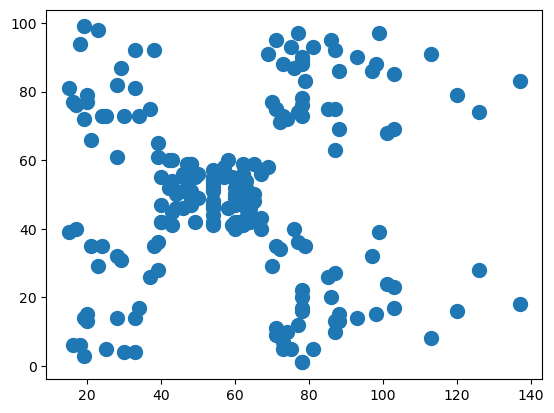

In [4]:
# Plot data untuk melihat distribusi (2D plot antara Annual Income dan Spending Score)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100)
plt.show()

In [5]:
# Buat model KMeans, dengan asumsi kita menggunakan k=2 terlebih dahulu
cl_kmeans = KMeans(n_clusters=2, random_state=42)

# Fit dan prediksi cluster
y_kmeans = cl_kmeans.fit_predict(X)

c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


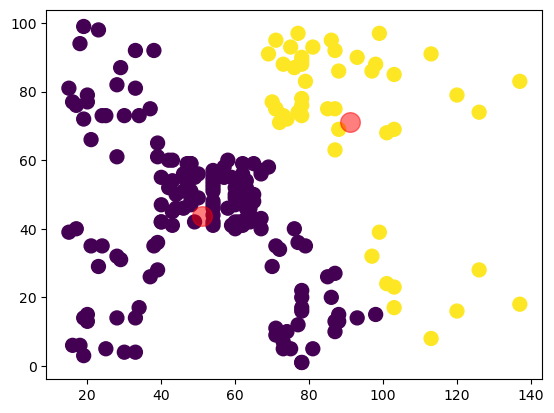

In [6]:
# Plot hasil clustering
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

In [7]:
# Cek Nilai SSE (Sum of Squared Errors)
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 183653.32894736837


c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

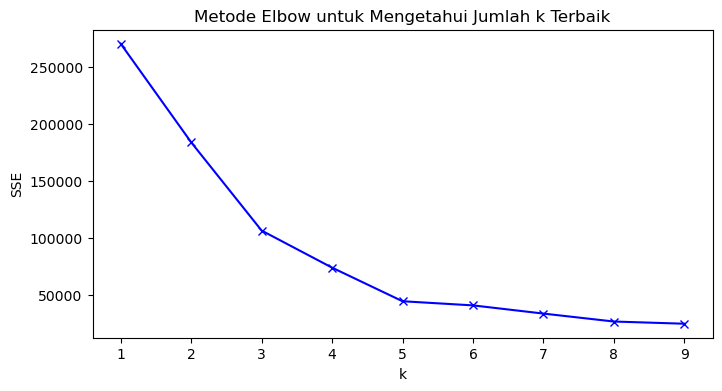

In [8]:
# Implementasi Metode Elbow untuk mencari k terbaik
# List nilai SSE untuk setiap k
sse = []

# Cari k terbaik dari 1-10
K = range(1, 10)

# Cek nilai SSE setiap k
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)

# Plotting metode Elbow
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [9]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28
k=2; SSE=183653.32894736837
k=3; SSE=106348.37306211118
k=4; SSE=73880.64496247197
k=5; SSE=44448.45544793371
k=6; SSE=40825.16946386946
k=7; SSE=33642.579220779226
k=8; SSE=26686.83778518779
k=9; SSE=24766.47160979344


#### Model SOM untuk segmentasi citra lain


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [11]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)
    return weights

In [16]:
# Load citra Kitten
Female_path = "assets/female.tiff"
Female = io.imread(Female_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

In [17]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Female, num_epochs, initial_learning_rate, initial_neighborhood_radius)

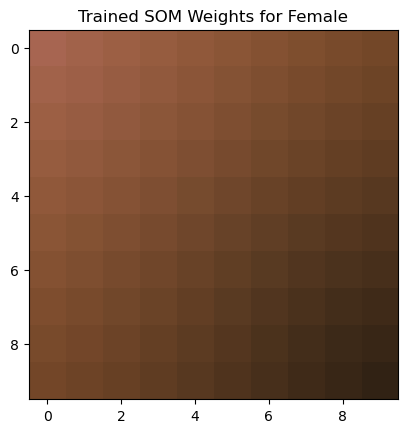

In [18]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Female')
plt.show()